In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [39]:
i = 0
folder = '/mnt/Storage/gvicentini/prova_R/R0/'
for file in os.listdir(folder):
    i += 1
print (i)

343


In [44]:
i = 0
tot = np.empty((343, 20, 1), dtype=np.float64)
folder = '/mnt/Storage/gvicentini/electron_time/'
for file in os.listdir(folder):
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    tot[i] = array
    i += 1

IndexError: index 343 is out of bounds for axis 0 with size 343

In [11]:
folder + file

'/mnt/Storage/gvicentini/positron_time/0pos_time20054.npy'

In [13]:
array = np.load(folder + file)

In [36]:
file.startswith('0el')

True

In [11]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

# R < 1m

In [45]:
folder = '/mnt/Storage/gvicentini/prova_R/R0/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

343


In [46]:
R0 = np.empty((343, 20, 1), dtype=np.float64)
labels_R0 = np.zeros(343)
folder = '/mnt/Storage/gvicentini/prova_R/R0/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R0[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R0[i] = array
    i += 1

In [54]:
R0 = R0/R0.max()

In [56]:
R0.shape

(343, 20, 1)

In [57]:
from sklearn.model_selection import train_test_split
R0X_train, R0X_test, R0Y_train, R0Y_test = train_test_split(R0 , labels_R0 ,test_size=0.2)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model0 = Sequential()
model0.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model0.add(MaxPooling1D(2))
model0.add(Dropout(0.2))
model0.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(Dropout(0.2))
model0.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model0.add(MaxPooling1D(2))
model0.add(Dropout(0.2))
model0.add(Flatten())
model0.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model0.add(Dropout(0.5))
model0.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [60]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model0.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [61]:
history0 = model0.fit(R0X_train, R0Y_train, batch_size=64, validation_data=(R0X_test, R0Y_test), epochs=20)

Train on 274 samples, validate on 69 samples
Epoch 1/20
274/274 [==============================] - 1s 4ms/step - loss: 0.7198 - accuracy: 0.4964 - val_loss: 0.7088 - val_accuracy: 0.4783
Epoch 2/20
274/274 [==============================] - 0s 166us/step - loss: 0.7129 - accuracy: 0.4854 - val_loss: 0.7050 - val_accuracy: 0.4783
Epoch 3/20
274/274 [==============================] - 0s 128us/step - loss: 0.7076 - accuracy: 0.4781 - val_loss: 0.7023 - val_accuracy: 0.4783
Epoch 4/20
274/274 [==============================] - 0s 181us/step - loss: 0.6938 - accuracy: 0.5146 - val_loss: 0.6996 - val_accuracy: 0.4783
Epoch 5/20
274/274 [==============================] - 0s 121us/step - loss: 0.7229 - accuracy: 0.4416 - val_loss: 0.6984 - val_accuracy: 0.4783
Epoch 6/20
274/274 [==============================] - 0s 117us/step - loss: 0.6856 - accuracy: 0.5657 - val_loss: 0.6974 - val_accuracy: 0.4783
Epoch 7/20
274/274 [==============================] - 0s 115us/step - loss: 0.7062 - accuracy

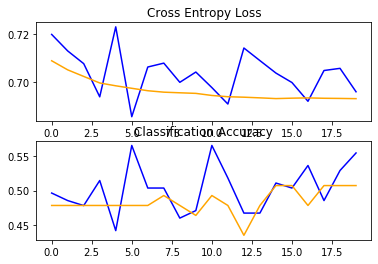

In [68]:
summarize_diagnostics(history0)

# 1 < R < 2 m

In [2]:
folder = '/mnt/Storage/gvicentini/prova_R/R1/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

2388


In [4]:
R1 = np.empty((2388, 20, 1), dtype=np.float64)
labels_R1 = np.zeros(2388)
folder = '/mnt/Storage/gvicentini/prova_R/R1/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R1[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R1[i] = array
    i += 1

In [8]:
R1 = R1/R1.max()

In [10]:
R1.shape

(2388, 20, 1)

In [11]:
from sklearn.model_selection import train_test_split
R1X_train, R1X_test, R1Y_train, R1Y_test = train_test_split(R1 , labels_R1 ,test_size=0.2)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model1 = Sequential()
model1.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [13]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
history1 = model1.fit(R1X_train, R1Y_train, batch_size=64, validation_data=(R1X_test, R1Y_test), epochs=20)

Train on 1910 samples, validate on 478 samples
Epoch 1/20
1910/1910 [==============================] - 1s 462us/step - loss: 0.7177 - accuracy: 0.5094 - val_loss: 0.6970 - val_accuracy: 0.4519
Epoch 2/20
1910/1910 [==============================] - 0s 115us/step - loss: 0.7116 - accuracy: 0.5016 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/20
1910/1910 [==============================] - 0s 122us/step - loss: 0.7107 - accuracy: 0.5016 - val_loss: 0.6955 - val_accuracy: 0.4414
Epoch 4/20
1910/1910 [==============================] - 0s 109us/step - loss: 0.7088 - accuracy: 0.5115 - val_loss: 0.6955 - val_accuracy: 0.4435
Epoch 5/20
1910/1910 [==============================] - 0s 105us/step - loss: 0.7111 - accuracy: 0.4979 - val_loss: 0.6946 - val_accuracy: 0.4582
Epoch 6/20
1910/1910 [==============================] - 0s 94us/step - loss: 0.7059 - accuracy: 0.5120 - val_loss: 0.6936 - val_accuracy: 0.4874
Epoch 7/20
1910/1910 [==============================] - 0s 99us/step - loss: 0

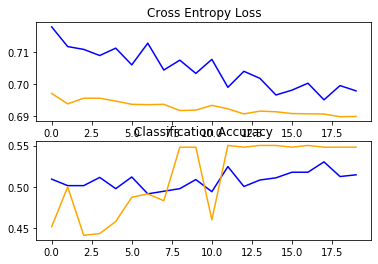

In [16]:
summarize_diagnostics(history1)

# 2 < R < 3 m 

In [2]:
folder = '/mnt/Storage/gvicentini/prova_R/R2/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

6364


In [3]:
R2 = np.empty((6364, 20, 1), dtype=np.float64)
labels_R2 = np.zeros(6364)
folder = '/mnt/Storage/gvicentini/prova_R/R2/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R2[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R2[i] = array
    i += 1

In [4]:
R2 = R2/R2.max()

In [5]:
from sklearn.model_selection import train_test_split
R2X_train, R2X_test, R2Y_train, R2Y_test = train_test_split(R2 , labels_R2 ,test_size=0.2)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model2 = Sequential()
model2.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
history2 = model2.fit(R2X_train, R2Y_train, batch_size=64, validation_data=(R2X_test, R2Y_test), epochs=20)

Train on 5091 samples, validate on 1273 samples
Epoch 1/20
5091/5091 [==============================] - 2s 301us/step - loss: 0.7385 - accuracy: 0.5241 - val_loss: 0.6889 - val_accuracy: 0.5530
Epoch 2/20
5091/5091 [==============================] - 1s 104us/step - loss: 0.7272 - accuracy: 0.5034 - val_loss: 0.6884 - val_accuracy: 0.5405
Epoch 3/20
5091/5091 [==============================] - 1s 119us/step - loss: 0.7154 - accuracy: 0.5066 - val_loss: 0.6930 - val_accuracy: 0.5082
Epoch 4/20
5091/5091 [==============================] - 1s 117us/step - loss: 0.7092 - accuracy: 0.5148 - val_loss: 0.6918 - val_accuracy: 0.5208
Epoch 5/20
5091/5091 [==============================] - 1s 102us/step - loss: 0.7041 - accuracy: 0.5115 - val_loss: 0.6926 - val_accuracy: 0.5137
Epoch 6/20
5091/5091 [==============================] - 1s 101us/step - loss: 0.7020 - accuracy: 0.5190 - val_loss: 0.6926 - val_accuracy: 0.5137
Epoch 7/20
5091/5091 [==============================] - 1s 128us/step - loss

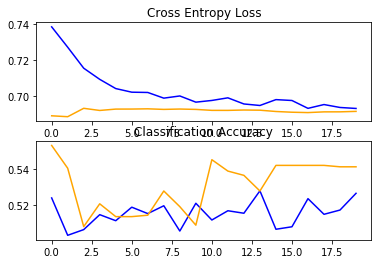

In [12]:
summarize_diagnostics(history2)

# 3 < R < 4 m

In [25]:
folder = '/mnt/Storage/gvicentini/prova_R/R3/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

12256


In [26]:
R3 = np.empty((12256, 20, 1), dtype=np.float64)
labels_R3 = np.zeros(12256)
folder = '/mnt/Storage/gvicentini/prova_R/R3/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R3[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R3[i] = array
    i += 1

In [29]:
R3 = R3/R3.max()

In [30]:
R3X_train, R3X_test, R3Y_train, R3Y_test = train_test_split(R3 , labels_R3 ,test_size=0.2)

In [31]:
model3 = Sequential()
model3.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))
model3.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

In [32]:
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
history3 = model1.fit(R3X_train, R3Y_train, batch_size=64, validation_data=(R3X_test, R3Y_test), epochs=20)

Train on 9804 samples, validate on 2452 samples
Epoch 1/20
9804/9804 [==============================] - 1s 110us/step - loss: 0.7011 - accuracy: 0.4897 - val_loss: 0.6941 - val_accuracy: 0.4943
Epoch 2/20
9804/9804 [==============================] - 1s 122us/step - loss: 0.6964 - accuracy: 0.5057 - val_loss: 0.6944 - val_accuracy: 0.5049
Epoch 3/20
9804/9804 [==============================] - 1s 111us/step - loss: 0.6960 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5131
Epoch 4/20
9804/9804 [==============================] - 1s 92us/step - loss: 0.6939 - accuracy: 0.5098 - val_loss: 0.6928 - val_accuracy: 0.5106
Epoch 5/20
9804/9804 [==============================] - 1s 97us/step - loss: 0.6942 - accuracy: 0.5114 - val_loss: 0.6922 - val_accuracy: 0.5086
Epoch 6/20
9804/9804 [==============================] - 1s 98us/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.6918 - val_accuracy: 0.5069
Epoch 7/20
9804/9804 [==============================] - 1s 112us/step - loss: 0

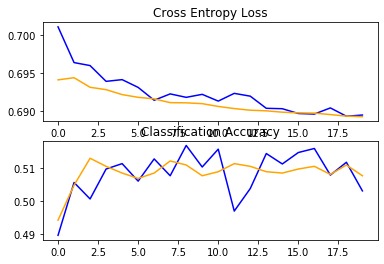

In [34]:
summarize_diagnostics(history3)

# 4 < R < 5 m

In [35]:
folder = '/mnt/Storage/gvicentini/prova_R/R4/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

20210


In [36]:
R4 = np.empty((20210, 20, 1), dtype=np.float64)
labels_R4 = np.zeros(20210)
folder = '/mnt/Storage/gvicentini/prova_R/R4/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R4[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R4[i] = array
    i += 1

In [37]:
R4 = R4/R4.max()

In [38]:
R4X_train, R4X_test, R4Y_train, R4Y_test = train_test_split(R4 , labels_R4 ,test_size=0.2)

In [39]:
model4 = Sequential()
model4.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

In [40]:
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [41]:
history4 = model1.fit(R4X_train, R4Y_train, batch_size=64, validation_data=(R4X_test, R4Y_test), epochs=20)

Train on 16168 samples, validate on 4042 samples
Epoch 1/20
16168/16168 [==============================] - 1s 93us/step - loss: 0.6879 - accuracy: 0.5181 - val_loss: 0.6878 - val_accuracy: 0.5015
Epoch 2/20
16168/16168 [==============================] - 1s 89us/step - loss: 0.6871 - accuracy: 0.5218 - val_loss: 0.6876 - val_accuracy: 0.5010
Epoch 3/20
16168/16168 [==============================] - 2s 98us/step - loss: 0.6871 - accuracy: 0.5158 - val_loss: 0.6868 - val_accuracy: 0.5022
Epoch 4/20
16168/16168 [==============================] - 2s 114us/step - loss: 0.6865 - accuracy: 0.5217 - val_loss: 0.6860 - val_accuracy: 0.5015
Epoch 5/20
16168/16168 [==============================] - 2s 108us/step - loss: 0.6865 - accuracy: 0.5143 - val_loss: 0.6855 - val_accuracy: 0.5173
Epoch 6/20
16168/16168 [==============================] - 2s 108us/step - loss: 0.6866 - accuracy: 0.5228 - val_loss: 0.6850 - val_accuracy: 0.5173
Epoch 7/20
16168/16168 [==============================] - 2s 115us

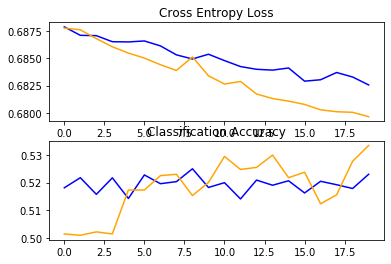

In [42]:
summarize_diagnostics(history4)

# 5 < R < 6 m

In [13]:
folder = '/mnt/Storage/gvicentini/prova_R/R5/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

30444


In [14]:
R5 = np.empty((30444, 20, 1), dtype=np.float64)
labels_R5 = np.zeros(30444)
folder = '/mnt/Storage/gvicentini/prova_R/R5/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R5[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R5[i] = array
    i += 1

In [15]:
R5 = R5/R5.max()

In [16]:
R5X_train, R5X_test, R5Y_train, R5Y_test = train_test_split(R5 , labels_R5 ,test_size=0.2)

In [17]:
model5 = Sequential()
model5.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model5.add(MaxPooling1D(2))
model5.add(Dropout(0.2))
model5.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(Dropout(0.2))
model5.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [18]:
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
history5 = model5.fit(R5X_train, R5Y_train, batch_size=64, validation_data=(R5X_test, R5Y_test), epochs=20)

Train on 24355 samples, validate on 6089 samples
Epoch 1/20
24355/24355 [==============================] - 3s 130us/step - loss: 0.7019 - accuracy: 0.5125 - val_loss: 0.6919 - val_accuracy: 0.5234
Epoch 2/20
24355/24355 [==============================] - 3s 104us/step - loss: 0.6947 - accuracy: 0.5158 - val_loss: 0.6917 - val_accuracy: 0.5300
Epoch 3/20
24355/24355 [==============================] - 3s 107us/step - loss: 0.6931 - accuracy: 0.5157 - val_loss: 0.6911 - val_accuracy: 0.5232
Epoch 4/20
24355/24355 [==============================] - 3s 110us/step - loss: 0.6928 - accuracy: 0.5132 - val_loss: 0.6907 - val_accuracy: 0.5236
Epoch 5/20
24355/24355 [==============================] - 3s 107us/step - loss: 0.6920 - accuracy: 0.5101 - val_loss: 0.6903 - val_accuracy: 0.5234
Epoch 6/20
24355/24355 [==============================] - 3s 106us/step - loss: 0.6913 - accuracy: 0.5129 - val_loss: 0.6899 - val_accuracy: 0.5234
Epoch 7/20
24355/24355 [==============================] - 3s 10

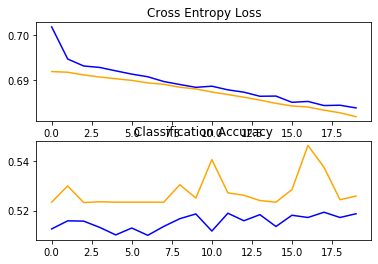

In [21]:
summarize_diagnostics(history5)

# 6 < R < 7 m

In [22]:
folder = '/mnt/Storage/gvicentini/prova_R/R6/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

42613


In [23]:
R6 = np.empty((42613, 20, 1), dtype=np.float64)
labels_R6 = np.zeros(42613)
folder = '/mnt/Storage/gvicentini/prova_R/R6/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R6[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R6[i] = array
    i += 1

In [24]:
R6 = R6/R6.max()

In [25]:
R6X_train, R6X_test, R6Y_train, R6Y_test = train_test_split(R6 , labels_R6 ,test_size=0.2)

In [26]:
model6 = Sequential()
model6.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model6.add(MaxPooling1D(2))
model6.add(Dropout(0.2))
model6.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(Dropout(0.2))
model6.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

In [27]:
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [28]:
history6 = model6.fit(R6X_train, R6Y_train, batch_size=64, validation_data=(R6X_test, R6Y_test), epochs=20)

Train on 34090 samples, validate on 8523 samples
Epoch 1/20
34090/34090 [==============================] - 4s 127us/step - loss: 0.7051 - accuracy: 0.5072 - val_loss: 0.6925 - val_accuracy: 0.5193
Epoch 2/20
34090/34090 [==============================] - 4s 104us/step - loss: 0.6954 - accuracy: 0.5051 - val_loss: 0.6925 - val_accuracy: 0.5177
Epoch 3/20
34090/34090 [==============================] - 4s 110us/step - loss: 0.6944 - accuracy: 0.5092 - val_loss: 0.6924 - val_accuracy: 0.5150
Epoch 4/20
34090/34090 [==============================] - 3s 102us/step - loss: 0.6927 - accuracy: 0.5177 - val_loss: 0.6912 - val_accuracy: 0.5181
Epoch 5/20
34090/34090 [==============================] - 4s 110us/step - loss: 0.6920 - accuracy: 0.5084 - val_loss: 0.6903 - val_accuracy: 0.5181
Epoch 6/20
34090/34090 [==============================] - 4s 108us/step - loss: 0.6902 - accuracy: 0.5147 - val_loss: 0.6894 - val_accuracy: 0.5181
Epoch 7/20
34090/34090 [==============================] - 4s 10

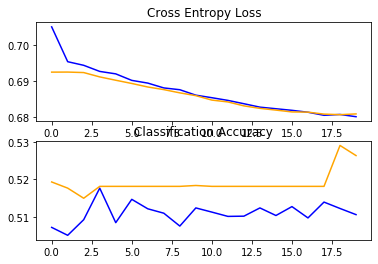

In [29]:
summarize_diagnostics(history6)

# 7 < R < 8 m

In [30]:
folder = '/mnt/Storage/gvicentini/prova_R/R7/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

56603


In [31]:
R7 = np.empty((56603, 20, 1), dtype=np.float64)
labels_R7 = np.zeros(56603)
folder = '/mnt/Storage/gvicentini/prova_R/R7/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R7[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R7[i] = array
    i += 1

In [32]:
R7 = R7/R7.max()

In [33]:
R7X_train, R7X_test, R7Y_train, R7Y_test = train_test_split(R7 , labels_R7 ,test_size=0.2)

In [34]:
model7 = Sequential()
model7.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model7.add(MaxPooling1D(2))
model7.add(Dropout(0.2))
model7.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(MaxPooling1D(2))
model7.add(Dropout(0.2))
model7.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(MaxPooling1D(2))
model7.add(Dropout(0.2))
model7.add(Flatten())
model7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model7.add(Dropout(0.5))
model7.add(Dense(1, activation='sigmoid'))

In [35]:
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [36]:
history7 = model7.fit(R7X_train, R7Y_train, batch_size=64, validation_data=(R7X_test, R7Y_test), epochs=20)

Train on 45282 samples, validate on 11321 samples
Epoch 1/20
45282/45282 [==============================] - 7s 162us/step - loss: 0.7035 - accuracy: 0.5110 - val_loss: 0.6925 - val_accuracy: 0.5248
Epoch 2/20
45282/45282 [==============================] - 5s 107us/step - loss: 0.6949 - accuracy: 0.5094 - val_loss: 0.6925 - val_accuracy: 0.5041
Epoch 3/20
45282/45282 [==============================] - 5s 110us/step - loss: 0.6934 - accuracy: 0.5112 - val_loss: 0.6909 - val_accuracy: 0.5091
Epoch 4/20
45282/45282 [==============================] - 5s 114us/step - loss: 0.6918 - accuracy: 0.5076 - val_loss: 0.6894 - val_accuracy: 0.5112
Epoch 5/20
45282/45282 [==============================] - 5s 110us/step - loss: 0.6898 - accuracy: 0.5083 - val_loss: 0.6879 - val_accuracy: 0.5054
Epoch 6/20
45282/45282 [==============================] - 5s 104us/step - loss: 0.6888 - accuracy: 0.5073 - val_loss: 0.6866 - val_accuracy: 0.5093
Epoch 7/20
45282/45282 [==============================] - 5s 1

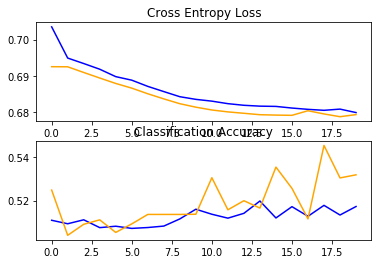

In [37]:
summarize_diagnostics(history7)

# 8 < R < 9 m

In [38]:
folder = '/mnt/Storage/gvicentini/prova_R/R8/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

72353


In [40]:
R8 = np.empty((72353, 20, 1), dtype=np.float64)
labels_R8 = np.zeros(72353)
folder = '/mnt/Storage/gvicentini/prova_R/R8/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R8[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R8[i] = array
    i += 1

In [41]:
R8 = R8/R8.max()

In [42]:
R8X_train, R8X_test, R8Y_train, R8Y_test = train_test_split(R8 , labels_R8 ,test_size=0.2)

In [43]:
model8 = Sequential()
model8.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model8.add(MaxPooling1D(2))
model8.add(Dropout(0.2))
model8.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(Dropout(0.2))
model8.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model8.add(MaxPooling1D(2))
model8.add(Dropout(0.2))
model8.add(Flatten())
model8.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model8.add(Dropout(0.5))
model8.add(Dense(1, activation='sigmoid'))

In [44]:
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
history8 = model8.fit(R8X_train, R8Y_train, batch_size=64, validation_data=(R8X_test, R8Y_test), epochs=20)

Train on 57882 samples, validate on 14471 samples
Epoch 1/20
57882/57882 [==============================] - 9s 153us/step - loss: 0.7011 - accuracy: 0.5094 - val_loss: 0.6925 - val_accuracy: 0.5183
Epoch 2/20
57882/57882 [==============================] - 7s 116us/step - loss: 0.6935 - accuracy: 0.5178 - val_loss: 0.6912 - val_accuracy: 0.5183
Epoch 3/20
57882/57882 [==============================] - 6s 105us/step - loss: 0.6908 - accuracy: 0.5143 - val_loss: 0.6882 - val_accuracy: 0.5183
Epoch 4/20
57882/57882 [==============================] - 6s 110us/step - loss: 0.6876 - accuracy: 0.5164 - val_loss: 0.6859 - val_accuracy: 0.5183
Epoch 5/20
57882/57882 [==============================] - 6s 111us/step - loss: 0.6862 - accuracy: 0.5146 - val_loss: 0.6845 - val_accuracy: 0.5183
Epoch 6/20
57882/57882 [==============================] - 6s 104us/step - loss: 0.6849 - accuracy: 0.5155 - val_loss: 0.6827 - val_accuracy: 0.5183
Epoch 7/20
57882/57882 [==============================] - 6s 1

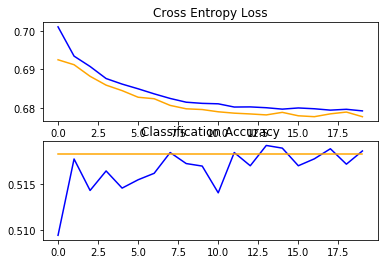

In [46]:
summarize_diagnostics(history8)

# 9 < R < 10 m

In [47]:
folder = '/mnt/Storage/gvicentini/prova_R/R9/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

90690


In [48]:
R9 = np.empty((90690, 20, 1), dtype=np.float64)
labels_R9 = np.zeros(90690)
folder = '/mnt/Storage/gvicentini/prova_R/R9/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R9[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R9[i] = array
    i += 1

In [49]:
R9 = R9/R9.max()

In [50]:
R9X_train, R9X_test, R9Y_train, R9Y_test = train_test_split(R9 , labels_R9 ,test_size=0.2)

In [51]:
model9 = Sequential()
model9.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.2))
model9.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.2))
model9.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model9.add(MaxPooling1D(2))
model9.add(Dropout(0.2))
model9.add(Flatten())
model9.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model9.add(Dropout(0.5))
model9.add(Dense(1, activation='sigmoid'))

In [52]:
model9.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [53]:
history9 = model9.fit(R9X_train, R9Y_train, batch_size=64, validation_data=(R9X_test, R9Y_test), epochs=20)

Train on 72552 samples, validate on 18138 samples
Epoch 1/20
72552/72552 [==============================] - 10s 140us/step - loss: 0.6991 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.5154
Epoch 2/20
72552/72552 [==============================] - 8s 114us/step - loss: 0.6926 - accuracy: 0.5154 - val_loss: 0.6884 - val_accuracy: 0.5153
Epoch 3/20
72552/72552 [==============================] - 8s 109us/step - loss: 0.6878 - accuracy: 0.5081 - val_loss: 0.6847 - val_accuracy: 0.5154
Epoch 4/20
72552/72552 [==============================] - 8s 111us/step - loss: 0.6846 - accuracy: 0.5140 - val_loss: 0.6823 - val_accuracy: 0.5154
Epoch 5/20
72552/72552 [==============================] - 8s 110us/step - loss: 0.6827 - accuracy: 0.5121 - val_loss: 0.6811 - val_accuracy: 0.5154
Epoch 6/20
72552/72552 [==============================] - 8s 113us/step - loss: 0.6818 - accuracy: 0.5152 - val_loss: 0.6805 - val_accuracy: 0.5154
Epoch 7/20
72552/72552 [==============================] - 8s 

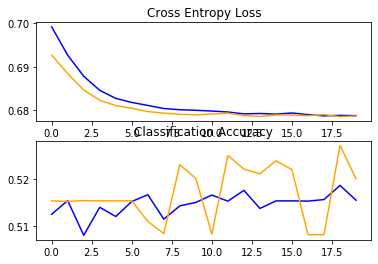

In [54]:
summarize_diagnostics(history9)

# 10 < R < 11 m

In [55]:
folder = '/mnt/Storage/gvicentini/prova_R/R10/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

110591


In [56]:
R10 = np.empty((110591, 20, 1), dtype=np.float64)
labels_R10 = np.zeros(110591)
folder = '/mnt/Storage/gvicentini/prova_R/R10/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R10[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R10[i] = array
    i += 1

In [57]:
R10 = R10/R10.max()

In [58]:
R10X_train, R10X_test, R10Y_train, R10Y_test = train_test_split(R10 , labels_R10 ,test_size=0.2)

In [59]:
model10 = Sequential()
model10.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model10.add(MaxPooling1D(2))
model10.add(Dropout(0.2))
model10.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(MaxPooling1D(2))
model10.add(Dropout(0.2))
model10.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model10.add(MaxPooling1D(2))
model10.add(Dropout(0.2))
model10.add(Flatten())
model10.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model10.add(Dropout(0.5))
model10.add(Dense(1, activation='sigmoid'))

In [60]:
model10.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [61]:
history10 = model10.fit(R10X_train, R10Y_train, batch_size=64, validation_data=(R10X_test, R10Y_test), epochs=20)

Train on 88472 samples, validate on 22119 samples
Epoch 1/20
88472/88472 [==============================] - 13s 144us/step - loss: 0.7007 - accuracy: 0.5066 - val_loss: 0.6926 - val_accuracy: 0.5103
Epoch 2/20
88472/88472 [==============================] - 9s 106us/step - loss: 0.6921 - accuracy: 0.5082 - val_loss: 0.6889 - val_accuracy: 0.5168
Epoch 3/20
88472/88472 [==============================] - 10s 112us/step - loss: 0.6880 - accuracy: 0.5063 - val_loss: 0.6855 - val_accuracy: 0.5050
Epoch 4/20
88472/88472 [==============================] - 10s 110us/step - loss: 0.6850 - accuracy: 0.5122 - val_loss: 0.6829 - val_accuracy: 0.5079
Epoch 5/20
88472/88472 [==============================] - 10s 111us/step - loss: 0.6831 - accuracy: 0.5132 - val_loss: 0.6805 - val_accuracy: 0.5059
Epoch 6/20
88472/88472 [==============================] - 10s 110us/step - loss: 0.6819 - accuracy: 0.5150 - val_loss: 0.6797 - val_accuracy: 0.5067
Epoch 7/20
88472/88472 [==============================] -

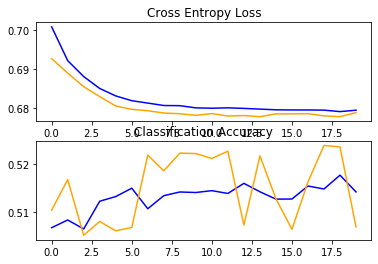

In [62]:
summarize_diagnostics(history10)

# 11 < R < 12 m

In [71]:
folder = '/mnt/Storage/gvicentini/prova_R/R11/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

132078


In [72]:
R11 = np.empty((132078, 20, 1), dtype=np.float64)
labels_R11 = np.zeros(132078)
folder = '/mnt/Storage/gvicentini/prova_R/R11/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R11[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R11[i] = array
    i += 1

In [73]:
R11 = R11/R11.max()

In [74]:
R11X_train, R11X_test, R11Y_train, R11Y_test = train_test_split(R11 , labels_R11 ,test_size=0.2)

In [75]:
model11 = Sequential()
model11.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model11.add(MaxPooling1D(2))
model11.add(Dropout(0.2))
model11.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model11.add(MaxPooling1D(2))
model11.add(Dropout(0.2))
model11.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model11.add(MaxPooling1D(2))
model11.add(Dropout(0.2))
model11.add(Flatten())
model11.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model11.add(Dropout(0.5))
model11.add(Dense(1, activation='sigmoid'))

In [76]:
model11.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [77]:
history11 = model11.fit(R11X_train, R11Y_train, batch_size=64, validation_data=(R11X_test, R11Y_test), epochs=20)

Train on 105662 samples, validate on 26416 samples
Epoch 1/20
105662/105662 [==============================] - 14s 131us/step - loss: 0.6982 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5111
Epoch 2/20
105662/105662 [==============================] - 12s 116us/step - loss: 0.6932 - accuracy: 0.5122 - val_loss: 0.6921 - val_accuracy: 0.5111
Epoch 3/20
105662/105662 [==============================] - 11s 107us/step - loss: 0.6899 - accuracy: 0.5119 - val_loss: 0.6865 - val_accuracy: 0.5111
Epoch 4/20
105662/105662 [==============================] - 12s 111us/step - loss: 0.6848 - accuracy: 0.5126 - val_loss: 0.6825 - val_accuracy: 0.5111
Epoch 5/20
105662/105662 [==============================] - 12s 109us/step - loss: 0.6824 - accuracy: 0.5129 - val_loss: 0.6808 - val_accuracy: 0.5111
Epoch 6/20
105662/105662 [==============================] - 12s 114us/step - loss: 0.6814 - accuracy: 0.5112 - val_loss: 0.6804 - val_accuracy: 0.5111
Epoch 7/20
105662/105662 [=================

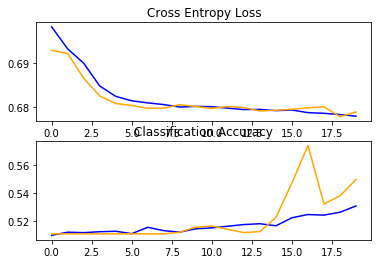

In [78]:
summarize_diagnostics(history11)

# 12 < R < 13 m

In [81]:
folder = '/mnt/Storage/gvicentini/prova_R/R12/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

156114


In [80]:
R12 = np.empty((156114, 20, 1), dtype=np.float64)
labels_R12 = np.zeros(156114)
folder = '/mnt/Storage/gvicentini/prova_R/R12/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R12[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R12[i] = array
    i += 1

In [88]:
R12 = R12/R12.max()

In [89]:
R12X_train, R12X_test, R12Y_train, R12Y_test = train_test_split(R12 , labels_R12 ,test_size=0.2)

In [90]:
model12 = Sequential()
model12.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model12.add(MaxPooling1D(2))
model12.add(Dropout(0.2))
model12.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model12.add(MaxPooling1D(2))
model12.add(Dropout(0.2))
model12.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model12.add(MaxPooling1D(2))
model12.add(Dropout(0.2))
model12.add(Flatten())
model12.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model12.add(Dropout(0.5))
model12.add(Dense(1, activation='sigmoid'))

In [91]:
model12.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [92]:
history12 = model12.fit(R12X_train, R12Y_train, batch_size=64, validation_data=(R12X_test, R12Y_test), epochs=20)

Train on 124891 samples, validate on 31223 samples
Epoch 1/20
124891/124891 [==============================] - 15s 119us/step - loss: 0.6973 - accuracy: 0.5116 - val_loss: 0.6924 - val_accuracy: 0.5131
Epoch 2/20
124891/124891 [==============================] - 14s 108us/step - loss: 0.6919 - accuracy: 0.5113 - val_loss: 0.6892 - val_accuracy: 0.5131
Epoch 3/20
124891/124891 [==============================] - 14s 110us/step - loss: 0.6862 - accuracy: 0.5127 - val_loss: 0.6837 - val_accuracy: 0.5131
Epoch 4/20
124891/124891 [==============================] - 14s 114us/step - loss: 0.6828 - accuracy: 0.5132 - val_loss: 0.6813 - val_accuracy: 0.5131
Epoch 5/20
124891/124891 [==============================] - 13s 106us/step - loss: 0.6810 - accuracy: 0.5171 - val_loss: 0.6799 - val_accuracy: 0.5162
Epoch 6/20
124891/124891 [==============================] - 14s 110us/step - loss: 0.6804 - accuracy: 0.5154 - val_loss: 0.6799 - val_accuracy: 0.5171
Epoch 7/20
124891/124891 [=================

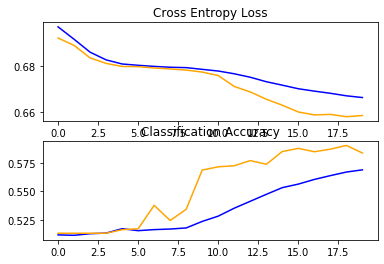

In [93]:
summarize_diagnostics(history12)

# 13 < R < 14 m

In [94]:
folder = '/mnt/Storage/gvicentini/prova_R/R13/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

183020


In [97]:
R13 = np.empty((183020, 20, 1), dtype=np.float64)
labels_R13 = np.zeros(183020)
folder = '/mnt/Storage/gvicentini/prova_R/R13/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R13[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R13[i] = array
    i += 1

In [98]:
R13 = R13/R13.max()

In [99]:
R13X_train, R13X_test, R13Y_train, R13Y_test = train_test_split(R13 , labels_R13 ,test_size=0.2)

In [100]:
model13 = Sequential()
model13.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model13.add(MaxPooling1D(2))
model13.add(Dropout(0.2))
model13.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model13.add(MaxPooling1D(2))
model13.add(Dropout(0.2))
model13.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model13.add(MaxPooling1D(2))
model13.add(Dropout(0.2))
model13.add(Flatten())
model13.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model13.add(Dropout(0.5))
model13.add(Dense(1, activation='sigmoid'))

In [101]:
model13.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [102]:
history13 = model13.fit(R13X_train, R13Y_train, batch_size=64, validation_data=(R13X_test, R13Y_test), epochs=20)

Train on 146416 samples, validate on 36604 samples
Epoch 1/20
146416/146416 [==============================] - 19s 127us/step - loss: 0.6949 - accuracy: 0.5087 - val_loss: 0.6894 - val_accuracy: 0.5120
Epoch 2/20
146416/146416 [==============================] - 16s 112us/step - loss: 0.6871 - accuracy: 0.5098 - val_loss: 0.6831 - val_accuracy: 0.5120
Epoch 3/20
146416/146416 [==============================] - 16s 112us/step - loss: 0.6832 - accuracy: 0.5139 - val_loss: 0.6806 - val_accuracy: 0.5120
Epoch 4/20
146416/146416 [==============================] - 15s 105us/step - loss: 0.6814 - accuracy: 0.5131 - val_loss: 0.6796 - val_accuracy: 0.5120
Epoch 5/20
146416/146416 [==============================] - 15s 105us/step - loss: 0.6808 - accuracy: 0.5138 - val_loss: 0.6792 - val_accuracy: 0.5181
Epoch 6/20
146416/146416 [==============================] - 16s 111us/step - loss: 0.6804 - accuracy: 0.5132 - val_loss: 0.6791 - val_accuracy: 0.5120
Epoch 7/20
146416/146416 [=================

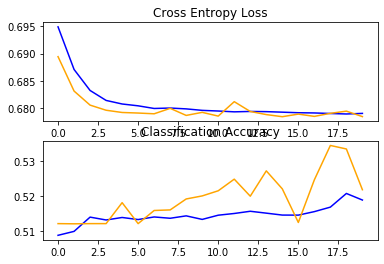

In [103]:
summarize_diagnostics(history13)

# 14 < R < 15 m

In [104]:
folder = '/mnt/Storage/gvicentini/prova_R/R14/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

210663


In [105]:
R14 = np.empty((210663, 20, 1), dtype=np.float64)
labels_R14 = np.zeros(210663)
folder = '/mnt/Storage/gvicentini/prova_R/R14/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R14[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R14[i] = array
    i += 1

In [106]:
R14 = R14/R14.max()

In [107]:
R14X_train, R14X_test, R14Y_train, R14Y_test = train_test_split(R14 , labels_R14 ,test_size=0.2)

In [108]:
model14 = Sequential()
model14.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model14.add(MaxPooling1D(2))
model14.add(Dropout(0.2))
model14.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model14.add(MaxPooling1D(2))
model14.add(Dropout(0.2))
model14.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model14.add(MaxPooling1D(2))
model14.add(Dropout(0.2))
model14.add(Flatten())
model14.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model14.add(Dropout(0.5))
model14.add(Dense(1, activation='sigmoid'))

In [109]:
model14.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [110]:
history14 = model14.fit(R14X_train, R14Y_train, batch_size=64, validation_data=(R14X_test, R14Y_test), epochs=20)

Train on 168530 samples, validate on 42133 samples
Epoch 1/20
168530/168530 [==============================] - 20s 121us/step - loss: 0.6962 - accuracy: 0.5102 - val_loss: 0.6922 - val_accuracy: 0.5163
Epoch 2/20
168530/168530 [==============================] - 18s 105us/step - loss: 0.6890 - accuracy: 0.5119 - val_loss: 0.6825 - val_accuracy: 0.5163
Epoch 3/20
168530/168530 [==============================] - 18s 105us/step - loss: 0.6830 - accuracy: 0.5129 - val_loss: 0.6792 - val_accuracy: 0.5163
Epoch 4/20
168530/168530 [==============================] - 18s 108us/step - loss: 0.6811 - accuracy: 0.5142 - val_loss: 0.6788 - val_accuracy: 0.5163
Epoch 5/20
168530/168530 [==============================] - 17s 103us/step - loss: 0.6803 - accuracy: 0.5132 - val_loss: 0.6780 - val_accuracy: 0.5163
Epoch 6/20
168530/168530 [==============================] - 19s 111us/step - loss: 0.6800 - accuracy: 0.5128 - val_loss: 0.6776 - val_accuracy: 0.5163
Epoch 7/20
168530/168530 [=================

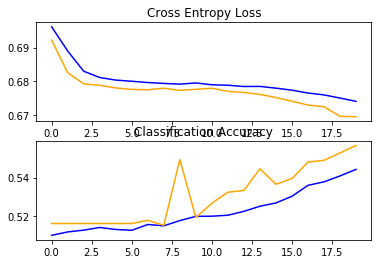

In [111]:
summarize_diagnostics(history14)

# 15 < R < 16 m

In [112]:
folder = '/mnt/Storage/gvicentini/prova_R/R15/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

240544


In [113]:
R15 = np.empty((240544, 20, 1), dtype=np.float64)
labels_R15 = np.zeros(240544)
folder = '/mnt/Storage/gvicentini/prova_R/R15/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R15[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R15[i] = array
    i += 1

In [114]:
R15 = R15/R15.max()

In [115]:
R15X_train, R15X_test, R15Y_train, R15Y_test = train_test_split(R15 , labels_R15 ,test_size=0.2)

In [116]:
model15 = Sequential()
model15.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model15.add(MaxPooling1D(2))
model15.add(Dropout(0.2))
model15.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model15.add(MaxPooling1D(2))
model15.add(Dropout(0.2))
model15.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model15.add(MaxPooling1D(2))
model15.add(Dropout(0.2))
model15.add(Flatten())
model15.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model15.add(Dropout(0.5))
model15.add(Dense(1, activation='sigmoid'))

In [117]:
model15.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [118]:
history15 = model15.fit(R15X_train, R15Y_train, batch_size=64, validation_data=(R15X_test, R15Y_test), epochs=20)

Train on 192435 samples, validate on 48109 samples
Epoch 1/20
192435/192435 [==============================] - 23s 120us/step - loss: 0.6953 - accuracy: 0.5108 - val_loss: 0.6901 - val_accuracy: 0.5158
Epoch 2/20
192435/192435 [==============================] - 20s 106us/step - loss: 0.6869 - accuracy: 0.5134 - val_loss: 0.6814 - val_accuracy: 0.5158
Epoch 3/20
192435/192435 [==============================] - 21s 108us/step - loss: 0.6818 - accuracy: 0.5147 - val_loss: 0.6791 - val_accuracy: 0.5190
Epoch 4/20
192435/192435 [==============================] - 21s 109us/step - loss: 0.6805 - accuracy: 0.5157 - val_loss: 0.6786 - val_accuracy: 0.5233
Epoch 5/20
192435/192435 [==============================] - 22s 112us/step - loss: 0.6801 - accuracy: 0.5181 - val_loss: 0.6789 - val_accuracy: 0.5272
Epoch 6/20
192435/192435 [==============================] - 21s 108us/step - loss: 0.6797 - accuracy: 0.5186 - val_loss: 0.6785 - val_accuracy: 0.5287
Epoch 7/20
192435/192435 [=================

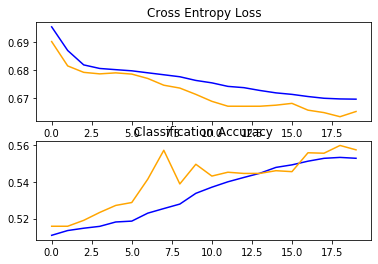

In [119]:
summarize_diagnostics(history15)

# 16 < R < 17 m

In [120]:
folder = '/mnt/Storage/gvicentini/prova_R/R16/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

271749


In [121]:
R16 = np.empty((271749, 20, 1), dtype=np.float64)
labels_R16 = np.zeros(271749)
folder = '/mnt/Storage/gvicentini/prova_R/R16/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R16[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R16[i] = array
    i += 1

In [122]:
R16 = R16/R16.max()

In [123]:
R16X_train, R16X_test, R16Y_train, R16Y_test = train_test_split(R16 , labels_R16 ,test_size=0.2)

In [124]:
model16 = Sequential()
model16.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model16.add(MaxPooling1D(2))
model16.add(Dropout(0.2))
model16.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model16.add(MaxPooling1D(2))
model16.add(Dropout(0.2))
model16.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model16.add(MaxPooling1D(2))
model16.add(Dropout(0.2))
model16.add(Flatten())
model16.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model16.add(Dropout(0.5))
model16.add(Dense(1, activation='sigmoid'))

In [125]:
model16.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [126]:
history16 = model16.fit(R16X_train, R16Y_train, batch_size=64, validation_data=(R16X_test, R16Y_test), epochs=20)

Train on 217399 samples, validate on 54350 samples
Epoch 1/20
217399/217399 [==============================] - 27s 123us/step - loss: 0.6954 - accuracy: 0.5089 - val_loss: 0.6906 - val_accuracy: 0.5141
Epoch 2/20
217399/217399 [==============================] - 24s 109us/step - loss: 0.6875 - accuracy: 0.5099 - val_loss: 0.6820 - val_accuracy: 0.5141
Epoch 3/20
217399/217399 [==============================] - 24s 109us/step - loss: 0.6822 - accuracy: 0.5121 - val_loss: 0.6794 - val_accuracy: 0.5186
Epoch 4/20
217399/217399 [==============================] - 24s 109us/step - loss: 0.6808 - accuracy: 0.5143 - val_loss: 0.6787 - val_accuracy: 0.5192
Epoch 5/20
217399/217399 [==============================] - 23s 106us/step - loss: 0.6803 - accuracy: 0.5165 - val_loss: 0.6783 - val_accuracy: 0.5187
Epoch 6/20
217399/217399 [==============================] - 23s 106us/step - loss: 0.6798 - accuracy: 0.5190 - val_loss: 0.6777 - val_accuracy: 0.5336
Epoch 7/20
217399/217399 [=================

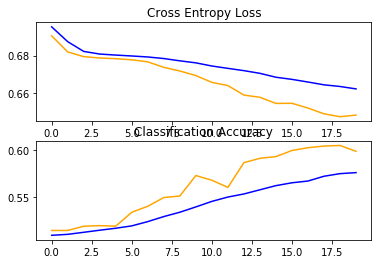

In [127]:
summarize_diagnostics(history16)

# R < 17 m

In [128]:
folder = '/mnt/Storage/gvicentini/prova_R/R17/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

210998


In [129]:
R17 = np.empty((210998, 20, 1), dtype=np.float64)
labels_R17 = np.zeros(210998)
folder = '/mnt/Storage/gvicentini/prova_R/R17/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_R17[i] = 1
    array = np.load(folder + file)
    array = np.reshape(array, (20,1))
    R17[i] = array
    i += 1

In [131]:
R17 = R17/R17.max()

In [132]:
R17X_train, R17X_test, R17Y_train, R17Y_test = train_test_split(R17 , labels_R17 ,test_size=0.2)

In [133]:
model17 = Sequential()
model17.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(20, 1)))
model17.add(MaxPooling1D(2))
model17.add(Dropout(0.2))
model17.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model17.add(MaxPooling1D(2))
model17.add(Dropout(0.2))
model17.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model17.add(MaxPooling1D(2))
model17.add(Dropout(0.2))
model17.add(Flatten())
model17.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model17.add(Dropout(0.5))
model17.add(Dense(1, activation='sigmoid'))

In [134]:
model17.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [135]:
history17 = model17.fit(R17X_train, R17Y_train, batch_size=64, validation_data=(R17X_test, R17Y_test), epochs=20)

Train on 168798 samples, validate on 42200 samples
Epoch 1/20
168798/168798 [==============================] - 19s 114us/step - loss: 0.6947 - accuracy: 0.5130 - val_loss: 0.6878 - val_accuracy: 0.5153
Epoch 2/20
168798/168798 [==============================] - 18s 105us/step - loss: 0.6878 - accuracy: 0.5156 - val_loss: 0.6862 - val_accuracy: 0.5152
Epoch 3/20
168798/168798 [==============================] - 19s 110us/step - loss: 0.6864 - accuracy: 0.5259 - val_loss: 0.6850 - val_accuracy: 0.5195
Epoch 4/20
168798/168798 [==============================] - 18s 109us/step - loss: 0.6853 - accuracy: 0.5304 - val_loss: 0.6834 - val_accuracy: 0.5277
Epoch 5/20
168798/168798 [==============================] - 18s 104us/step - loss: 0.6841 - accuracy: 0.5393 - val_loss: 0.6808 - val_accuracy: 0.5390
Epoch 6/20
168798/168798 [==============================] - 16s 96us/step - loss: 0.6824 - accuracy: 0.5415 - val_loss: 0.6781 - val_accuracy: 0.5474
Epoch 7/20
168798/168798 [==================

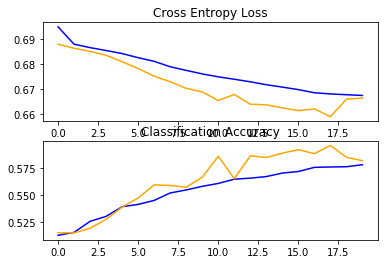

In [136]:
summarize_diagnostics(history17)